# Muse Signal Processing Workshop
## Merlin NeuroTech  - Queen's University
## Nicole Proulx
### February 2019

In [33]:
import glob
import warnings

import numpy as np
import matplotlib.pyplot as plt
import mne
from mne import io

%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
warnings.filterwarnings('ignore')


In [154]:
fnames = glob.glob('/Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/*.fif')
raw = io.read_raw_fif(fnames[1]).load_data()

Opening raw data file /Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/002_n_o_Muse-64F4_2018-10-18--12-49-03_1549231218832.fif...
Isotrak not found
    Range : 0 ... 32255 =      0.000 ...   125.996 secs
Ready.
Reading 0 ... 32255  =      0.000 ...   125.996 secs...


# EEG Signal Processing

## Why use signal processing?

## Steps
* Preprocessing (Epoching, Filtering, artifact detection, etc.)
* Feature Extraction




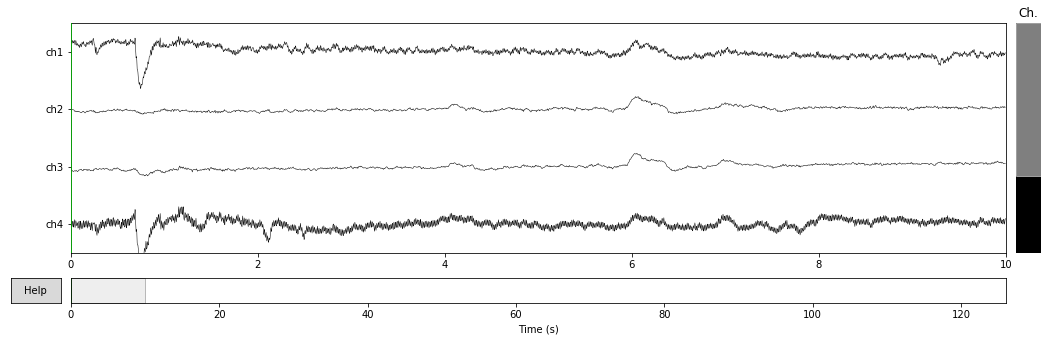

Effective window size : 8.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


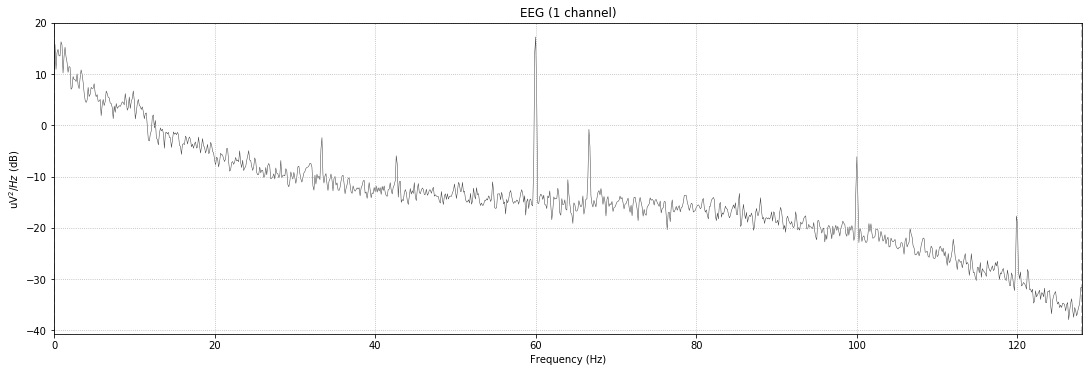

In [155]:
fig = raw.plot(n_channels=4, scalings={'eeg': 100e-6})
fig = raw.plot_psd(picks=0)

# Filtering

## Common EEG filtering:
* Notch (band-stop) 
    * Remove 50 or 60 Hz powerline noise
* Band-pass
    * Only keep 2-40 Hz range of interest
* Low-pass
    * Remove high frequency electronic and muscle activity noise
* High-pass
    * Remove slow DC signal


In [156]:
data = raw.get_data(picks=0, start=20000, stop=25000).reshape(-1, 1)
time = raw.times[20000:25000]

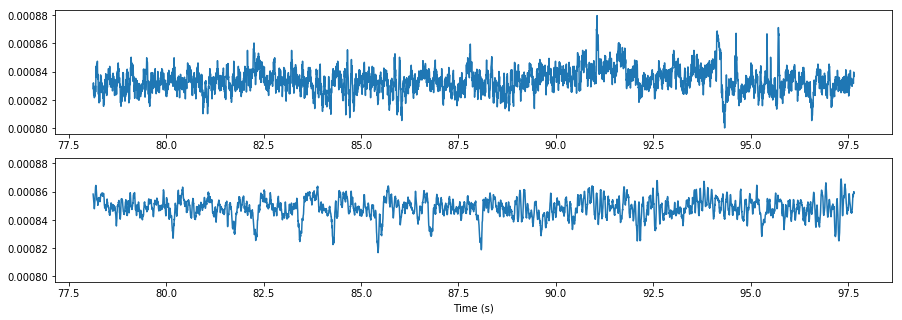

In [157]:
from scipy import signal

l_freq = 65
h_freq = 45
order = 5
b, a = signal.bessel(order, [h_freq/(raw.info['sfreq']/2), l_freq/(raw.info['sfreq']/2)],
                     btype='bandstop')

fig, ax = plt.subplots(2,1, sharey=True)
ax[0].plot(time, data)
ax[1].plot(time, filt_data)
ax[1].set_xlabel('Time (s)');


Setting up band-stop filter from 55 - 65 Hz
Effective window size : 8.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


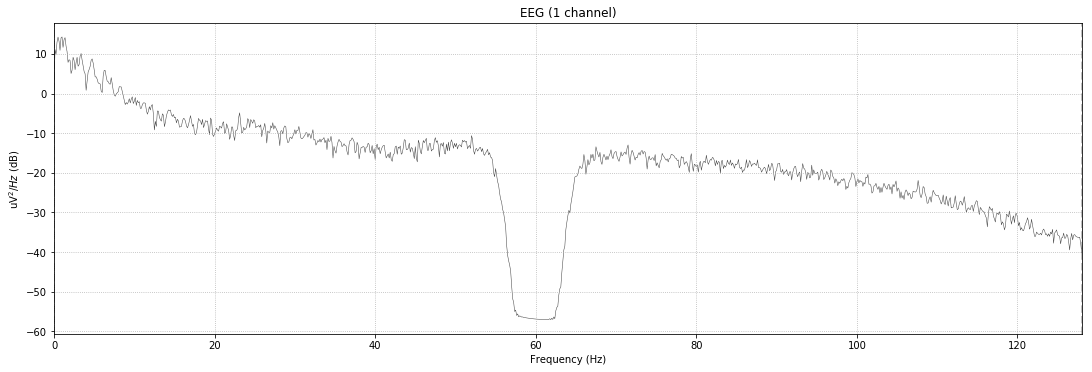

In [158]:
notch_raw = raw.filter(65, 55, fir_window='hamming', method='iir')
fig = notch_raw.plot_psd(picks=1)

## Filter Types:

### Bessel
* Minimal phase distortions
* Best for time series filtering

### Butterworth
* Maximal flat amplitude in the pass band
* Some phase distortion


### Chebychev
* Steep frequency cutoff
* Allows ripple in the pass band

# Artifact Detection

## Rejection vs Removal
* Rejecting bad epochs
* Removing the artifact component of a signal
    * Methods: ICA, EMD
    * Caution with sparse EEG

## Thresholds and classifiers
* Variance threshold on epochs `< 100 uV for ERPs`
* Training a classifier
    * Detect specific artifacts (e.g. blinks, muscle tension, ...)
    * Classify good vs bad epochs


# Feature Extraction
## Feature Types:
* **Temporal**
    * window characteristics: variance, peak to peak amplitude, kurtosis, ...
* **Spectral**
    * absolute band powers, relative band powers, peak frequency, event-related ...
* **Spatial**
    * coherence, connectivity between channels, ...
    * Common Spatial Patterns (CSP)



# Computing FFTs

* Short-term fourier transform
* Multitaper
    * More tapers -> more smoothing less SNR
* Welch
    * Average of periodograms
    * Better accuracy but lower resolution

## Other spectral methods
* Wavelets
* Hilbert transform
    * Empirical Mode Decomposition (EMD)


# Spectra Characterization

## Traditional Band Powers

## FOOOF


In [201]:
from fooof import FOOOF

fm = FOOOF()
fm.load(open('fooof_obj_example.json', 'r'))


In [202]:
fm.power_spectrum = np.append(fm.power_spectrum, [np.nan])

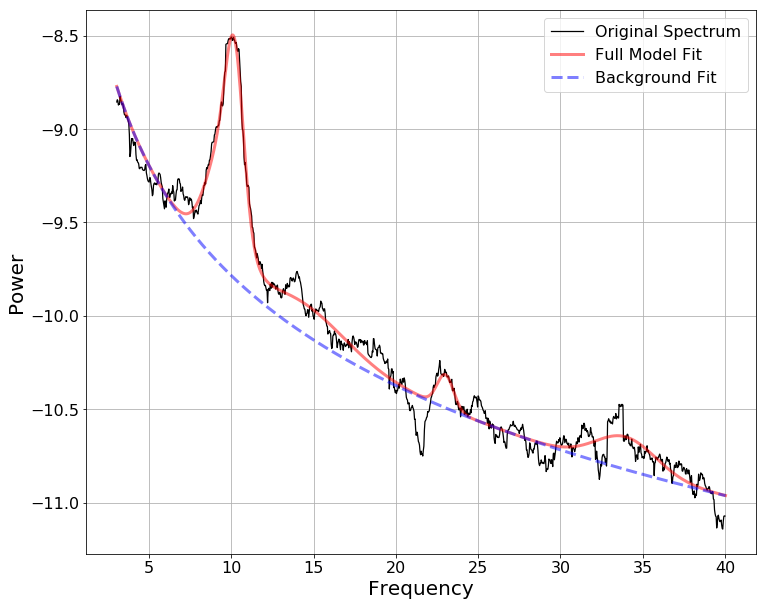

In [203]:
fm.plot()

# Real-time Processing

## Filters
### filtfilt vs lfilter
* filtfilt does a forward and backward pass -> zero phase
* lfilter does a forward pass only -> non-zero phase
* lfilter should be used for real-time filtering

### Filter state
* Saving the filter state between windows (scipy.lfilter.zi)


# Real-time Processing

## Circular Buffers
<br/> ` 0 0 0 0 `
<br/> ` 1 0 0 0 `
<br/>` 1 2 0 0 `
<br/>` 1 2 3 0 `
<br/>` 1 2 3 4 `
<br/>` 5 2 3 4 `
<br/>` 5 6 3 4 `
<br/>` 5 6 7 4 `


# Algorithm Development Pipeline at InteraXon

## Offline prototyping and analysis


## Real-time Prototyping
**Tools**:
 * Muse Direct
 * MuseLab
 * Python osc streaming


# Algorithm Development Pipeline at InteraXon

## Cloud Studies
* Evaluating current algorithms in production
* Back-testing new algorithms or modifications
* Population studies

## MuseTools: Internal python library of research tools
* Generalisable and reusable code
* Unit testing and software best practices
* **Musetools modules** (based on MNE stucture): 
    * Importing/exporting
    * Preprocessing
    * Features
    * Decoding / ML
    * Algorithms
    * Metrics
    * Real-time
    * Visualizations



# Best Practices with Muse

## NaNs
### What are they?
   Missing data due to poor bluetooth connection.
### How to deal with them?
* Interpolating NaNs, important prior to filtering or computing PSD
* Many numpy functions have versions that ignore NaNs (nanmean, nanvar, etc.)
    
    

# Best Practices with Muse

## Signal Quality
### Settling Time 
 Dry-electrodes take a few minutes to completely settle in terms of signal quality, especially with dry skin. For optimal performance, Muse should be worn a few minutes prior to starting data collection.

## Spatial Limitations with 4 channels
* 4 data points won't provide a very specific spatial map (compared to 32 or 64 channels)
* Consider where you're measuring (can't map posterior lobe activity if no channels in this area)
* ICA artifact removal: removing more than just the artifact (if removing 1/4 components)


## Other Muse tips
* Muse AUX channel: add an extra EEG channel or measure ECG
* Muse has a frontal reference:
    * Signals (ERPs, etc.) may look different than with a typical central reference but they are still there!
    * Papers with simultaneous Muse and full-cap EEG system experiments
    

# Machine Learning & EEG

* Feature selection
* Classifiers
* Classifier Ensembles
* Training, validation and testing

### Classification Considerations
* Subject-specific vs across subjects
* Including prior knowledge
* Avoiding the curse of dimensionality ` # of features << # of samples`
    * Feature selection
    * Feature reduction (e.g. PCA)


# Python Libraries and Toolboxes

    
* ***EEG/MEG specific***:
    * MNE
    * FOOOF
    * EEG Notebooks
    
* ***Machine learning***:
    * Scikit-learn
    * Pyriemann
    
* ***Visualizations***:
    * Matplotlib
    * Seaborn    

* ***Real-time streaming***:
    * pyliblo
    * pylsl

* ***General***: 
    * numpy
    * scipy
    * pandas